# Class04 Our very, very important problem
The material is from [openschool](https://opentechschool.github.io/python-data-intro/core/survey.html).

Suppose you’re a greengrocer, and you run a survey to see what radish varieties your customers prefer the most. You have your assistant type up the survey results into a text file on your computer, so you have 300 lines of survey data in the file [radishsurvey.txt](https://opentechschool.github.io/python-data-intro/files/radishsurvey.txt). Each line consists of a name, a hyphen, then a radish variety:

In [ ]:
Angelina Belmore - Plum Purple
Fred Smith - Red king
Matthew Wroe - White Icicle
Keira Cani - Sic ily Giant
Isaac Hallstrom - Red King
Jin Li - White Icicle
Georgia McKellar - Bunny Tail
Maximilian Avdeev - Cherry Belle
Lorna Beneventi - White Icicle
Lara Tunnecliffe - Plum Purple
Hugo Sodersten - Daikon ... and so on

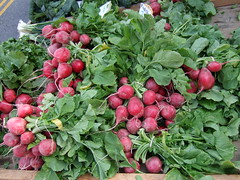

(You may have noticed that this is a very simple file: Unlike on a document or web page, there is no formatting whatsoever. It doesn’t look pretty, but it has one big advantage: This is the simplest type of text format to work with on a computer, so it is also the most easy to process and analyze.)

You want to know:
* What’s the most popular radish variety?
* What are the least popular?
* Did anyone vote twice?

# Useful?
… as *ridiculously contrived* as this example is, I’m sure lots of you have come across situations where you have some data and you want to extract some relevant information from it.

# Reading The Survey
Save the file [radishsurvey.txt](https://opentechschool.github.io/python-data-intro/files/radishsurvey.txt) to your computer. How do we write a program to find out which person voted for each radish preference?

We can easily open the file with Python and go through the file line by line. Each line will have a value like **"Jin Li - White Icicle\n"**. 

Then we can strip off the trailing newline with the **strip()** method. (If you are curious, you can look at the documentation for [open](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files) and [split](https://docs.python.org/3/library/stdtypes.html?highlight=strip#str.strip))

In [ ]:
with open("radishsurvey.txt") as file:
    for line in file:
        line = line.strip()
        # Do something with each line
        print(line)

We need a way to split each line into the name and the vote. Thankfully, Python comes with dozens of string methods including one called **split()**. Have a look at [the documentation for **split()**](https://docs.python.org/3.3/library/stdtypes.html#str.split) and see if you can figure out how to split each line into the name and the vote.

(Don’t worry if you can’t write a program that does this just yet, but at least have a think about it before you skip to the solution.)

In [ ]:
print("1,2,3,4,5".split(","))
print("cheese".split(","))
print("Jin Li - White - Icicle".split(" - "))
print("Jin Li - White Icicle".split("-"))

In [ ]:
with open("radishsurvey.txt") as file:
    for line in file:       
        line = line.strip()
        parts = line.split(" - ")
        name = parts[0]
        vote = parts[1]
        print(name + " voted for " + vote)

There’s a few things going on here, so let’s go through it line by line. *Walking through a program in your head and thinking about what each line does by itself is a good way to start to understand it.*

# Inspecting Votes

Can you write a program which only prints out the names of people who voted for *White Icicle* radishes?

Use the previous example as a base. You’ll need to compare the vote with the string **"White Icicle"**, for each line in the file.

In [ ]:
with open("radishsurvey.txt") as file:
    for line in file:
       line = line.strip()
       parts = line.split(" - ")
       name, vote = parts
       if vote == "White Icicle":
          print(name + " likes White Icicle!")

You might notice that the code splitting the line has become even shorter here. Instead of assigning each element of parts separately, we can assign them together using a technique called **“multiple assignment”**. The line **name, vote = parts** means to assign each variable to the corresponding item in the list.

# More about multiple assignment
Take a moment to play with multiple assignment in IPython Notebook (see the previous solution for an example of this.) Try some lines like these:

In [ ]:
a, b, c = [1, 2, 3]
print(b)
print(a)

In [ ]:
name, cheese, cracker = "Fred,Jarlsberg,Rye".split(",")
print(cheese)

You’ll notice that multiple assignment only works when the number of elements being assigned on the left hand side of the " = " matches the number on the right.

In [ ]:
name, cheese, cracker = "Fred,Jarlsberg,Rye,Buckwheat".split(",",2)
print(name)
print(cracker)

Confusion warning: The **optional argument** to split is the *number of times to split* the string, not the number of parts to split it into. So splitting it one time creates two strings, splitting it two times creates three strings, etc. A little “got you” moment for the unwary Python programmer!

# Tip
Multiple assignment actually makes use of a Python type called a 'tuple' and a notion called **'sequence unpacking'**. Tuples and sequence unpacking aren’t required knowledge to complete this workshop. However if you’re feeling curious you can have a peek at the [Python tutorial](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences) where the concept of a tuple is explained.

# Counting Votes
Can you write a program which counts the total number of votes for *White Icicle* radishes?

Use your previous solution as a base. You’ll need a variable to hold the number of votes recorded for *White Icicle*, which you increment (i.e add one to) as part of the loop.

In [ ]:
print("Counting votes for White Icicle...")
count = 0
with open("radishsurvey.txt") as file:
    for line in file:       
        line = line.strip()
        name, vote = line.split(" - ")
        if vote == "White Icicle":
            count = count + 1
print(count)

# Making a generic function
Can you rewrite this code as a *function definition* where you specify an argument with the name of the radish you want to count votes for, and the function returns the number of votes for that radish variety?

Using your function, can you write a program which counts votes for White Icicle, Daikon and Sicily Giant radishes, and prints out all three counts?

In [ ]:
def count_votes(radish):
    print("Counting votes for " + radish + "...")
    count = 0
    with open("radishsurvey.txt") as file:
        for line in file:       
            line = line.strip()
            name, vote = line.split(" - ")
            if vote == radish:
                count = count + 1
    return count

print(count_votes("White Icicle"))
print(count_votes("Daikon"))
print(count_votes("Sicily Giant"))

# Counting All The Votes
Counting votes for each radish variety is a bit time consuming, you have to know all the names in advance and you have to loop through the file multiple times. How about if you could automatically find all the varieties that were voted for, and count them all in one pass?

You’ll need a data structure where you can associate a radish variety with the number of votes counted for it. A dictionary would be perfect!

Imagine a program that can count votes to create a dictionary with contents like this:

In [ ]:
{
    'White Icicle': 65,
    'Snow Belle': 63,
    'Champion': 76,
    'Cherry Belle': 58,
    'Daikon': 63,
    'French Breakfast': 72,
    'Bunny Tail': 72,
    'Sicily Giant': 57,
    'Red King': 56,
    'Plum Purple': 56,
    'April Cross': 72
}

Meaning the key ‘White Icicle’ is associated with the value of 65 votes, the key ‘Snow Belle’ is associated with the value of 63 votes, ‘Champion’ has 76 votes, etc, etc.

Can you create such a program? Start with one of your previous vote-counting programs and try to modify it to count all varieties.

Here are two snippets of code you might find useful:

In [ ]:
# Create an empty dictionary for associating radish names
# with vote counts
counts = {}

if vote not in counts:
    # First vote for this variety
    counts[vote] = 1
else:
    # Increment the vote count
    counts[vote] = counts[vote] + 1

Remember that for dictionaries **counts[vote]** means “the value in counts which is associated with the key **vote**”. In this case, the key is a string (radish name) and the value is a number (vote count.)

In [ ]:
# Create an empty dictionary for associating radish names
# with vote counts
counts = {}

with open("radishsurvey.txt") as file:
    for line in file:       
        line = line.strip()
        name, vote = line.split(" - ")
        if vote not in counts:
            # First vote for this variety
            counts[vote] = 1
        else:
            # Increment the vote count
            counts[vote] = counts[vote] + 1
print(counts)

# Pretty printing
When you run this program the output is pretty hard for a person to read, even though it’s all there. What we want is to print the data in a way which is easy for people to read. Programmers call this **“pretty printing”**

In [ ]:
# instead of
print(counts)

In [ ]:
# A pretty printing option could be:
for name in counts:
    count = counts[name]
    print(name + ": " + str(count))

* This option prints each vote on its own line.
* Iterating through a dictionary (i.e., **for name in counts**) means iterating through the keys (radish variety names), so we still need to look up each value (the vote count) with **count = counts[name]**.
* Why do we use **str(count)** here? Try removing the **str()** call and see what python tells you! **str()** returns the string equivalent of the number, ie **str(12)** returns **"12"**.

Python needs to distinguish between strings and numbers for lots of reasons. For example,
* Using numbers **12+1** is **13**. 
* Using strings, **"12" + "1"** concatenates the strings to give you **"121"**.

# Tip
Python actually has a built-in module called pprint to make it easy to pretty-print things. You can use it like:

In [ ]:
from pprint import pprint
pprint(counts)

Try it out with your program if you like!

# Cleaning (“Munging”) data
There’s some weird stuff in our vote count:

In [ ]:
Red King: 1
red king: 3
White Icicle: 1
 Cherry Belle: 2
daikon: 4
Cherry  Belle: 1

*Vote rigging!* Probably not, it’s just unclean data. To a computer, “Red King” and “red King” look different because of the different capitalisation. So do “Cherry Belle” and “ Cherry Belle” because of the leading space.

We need to clean up (sometimes called “munge”) the data so it all looks the same.

We already know one munging function, **strip()**. Try applying **strip()** to each voting choice, to remove distinctions like “ Cherry Belle” and “Cherry Belle”.

How about “Red King” and “red king”? Take a look at the [Python string functions reference](http://docs.python.org/3/library/stdtypes.html#string-methods) and see if you can find a function that could transform these two so they look the same to the computer.

There are lots of functions which could remove the case distinction. **str.lower()** would convert all the names to all lower case, **str.upper()** would CONVERT THEM ALL TO UPPER CASE, or **str.capitalize()** would Capitalise the first letter only. Here’s one way:

In [ ]:
# Create an empty dictionary for associating radish names
# with vote counts
counts = {}

with open("radishsurvey.txt") as file:
    for line in file:
        line = line.strip()
        name, vote = line.split(" - ")
        # munge the vote string to clean it up
        vote = vote.strip().capitalize()
        if not vote in counts:
            # First vote for this variety
            counts[vote] = 1
        else:
            # Increment the vote count
            counts[vote] = counts[vote] + 1
print(counts)

If you’re having trouble spotting the difference here, it’s

In [ ]:
vote = vote.strip().capitalize()

Which means “take the variable called **vote**, and call the **strip()** function on it, and then call the **capitalize()** function on the result, and then assign that result back to the variable **vote**.

In [ ]:
# This could be written in two lines like this, if you prefer:
vote = vote.strip()
vote = vote.capitalize()

This would do the same thing when you run it. It’s up to you which you use, a good practice is to use the version which is the most readable to a human being, without being unnecessarily verbose.

# Not quite there
There are still some funny votes counted in the output of this program:

In [ ]:
Sicily  giant: 1
Plum  purple: 1
Cherry  belle: 1

They all have something in common, a **double space** "  " between the first and second words. Damn typos!

**strip()** only cleaned up additional whitespace at the start and end of the string.

The **replace** function can be used to replace all double spaces with a single space:

In [ ]:
vote = vote.replace("  ", " ")

Try putting that into your program so those last few votes get counted correctly.

# Checking if anyone voted twice
So far we’ve counted votes without paying attention to the name of the person who voted.

Can you modify your program so it also prints out a warning if anyone voted twice?

# Hint
You will need to start making a list of the names of everyone who has voted so far. Each time you see a new name, check if it is already in the list of names. Starting with an empty list of names, you can use **voterlist.append(newentry)** to append a new entry to the end.

You’ll need to apply the same data munging techniques to clean up people’s names, so that “Joanne Smith” and “joanne smith” are counted as the same person.

# Solution
This is just one of many ways to do this:

In [ ]:
# Create an empty dictionary for associating radish names
# with vote counts
counts = {}

# Create an empty list with the names of everyone who voted
votednames = []

In [ ]:
with open("radishsurvey.txt") as file:
    for line in file:
        line = line.strip()
        name, vote = line.split(" - ")
        
         # check if this person already voted
        if name in votednames:
            print(name + " has already voted! Fraud!")
            continue
        votednames.append(name)

        # munge the vote string to clean it up
        vote = vote.strip().capitalize()
        vote = vote.replace("  ", " ") # for double space problem
        if not vote in counts:
            # First vote for this variety
            counts[vote] = 1
        else:
            # Increment the vote count
            counts[vote] += 1

In [ ]:
print("Results:")
print()
for name in counts:
    print(name + ": " + str(counts[name]))

**counts[vote] += 1** is a shorthand for **counts[vote] = counts[vote] + 1**. This shortcut can be used any time you are performing operations like arithmetic, for example these are equivalent:

In [ ]:
x = x + 1
x += 1

In [ ]:
lemons = lemons * 3
lemons *= 3

You can also use **-=** and **/=** in the same way.

# Factoring our code
Our program here is now getting a little bit long, and a little bit complex. There are lots of comments pointing out what specific sections do.

Perhaps we can split it into functions to make it easier to read:
* A function to clean up (munge) a string to make it easy to match against (because we do the exact same thing to clean up names as we do to clean up the vote choice.)
* A function to check if someone has voted before
* A function to count a vote

Have a try at breaking out some of the parts into functions, one function at a time, without breaking the program.

IPython Notebook makes this easy because you can run the cell (with Shift-Enter if you like) after each change, to check the program still works.

# Solution
This is just one possible way to break it down:

In [ ]:
# Create an empty dictionary for associating radish names
# with vote counts
counts = {}

# Create an empty list with the names of everyone who voted
voted = []

# Clean up (munge) a string so it's easy to match against other     strings
def clean_string(s):
    return s.strip().capitalize().replace("  "," ")

# Check if someone has voted already and return True or False
def has_already_voted(name):
    if name in voted:
        print(name + " has already voted! Fraud!")
        return True
    return False

# Count a vote for the radish variety named 'radish'
def count_vote(radish):
    if not radish in counts:
        # First vote for this variety
        counts[radish] = 1
    else:
        # Increment the radish count
        counts[radish] = counts[radish] + 1


with open("radishsurvey.txt") as file:
    for line in file:
        line = line.strip()
        name, vote = line.split(" - ")
        name = clean_string(name)
        vote = clean_string(vote)
    
        if not has_already_voted(name):
            count_vote(vote)
        voted.append(name)

print("Results:")
print()
for name in counts:
    print(name + ": " + str(counts[name]))

What do you think? Is that easier to read and understand?

For small programs it’s not as important as big programs, but with big programs it becomes very important to factor things out so you can understand them - as well as so parts can be reused.

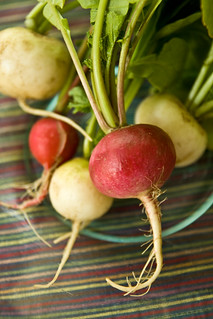

# Finding the winner

Our program prints the number of votes cast for each radish variety, but it doesn’t declare a winner. Can you update the program so it goes through the votes counted and finds the one with the most votes?

(You may want to add this as a totally separate cell, after the previous cells, rather than modifying your existing loops.)

# Hint
You can make a for loop which iterates over all of the keys in a dictionary by using the syntax **for key in dictionary:**. In this case it might be **for name in counts:**.

# Solution
You can do something like this:

In [ ]:
# Record the winning name and the votes cast for it
winner_name = "No winner"
winner_votes = 0

for name in counts:
    if counts[name] > winner_votes:
        winner_votes = counts[name]
        winner_name = name

print("The winner is: " + winner_name)

The loop shown above keeps track of one name, **winner_name**, and the number of votes cast for it. Each iteration through the loop it checks if there is a name with more votes than the current winner, and updates it if so.

# Challenge

Can you extract the part of the program that finds the winner into a function?

# Bigger Challenge
The solution shown above can’t deal with ties. It only updates **winner_name** if it finds another name with more votes than it, a second name with an equal number of votes will be ignored.

Can you write a winner function that could deal with a tie?